In [ ]:
#svm modele lineaire
#pour le modele lineairement separable

[[ 1  3 -1]
 [ 2  1 -1]
 [ 4  5 -1]
 [ 6  9 -1]
 [ 8  7 -1]
 [ 5  1  1]
 [ 7  1  1]
 [ 9  4  1]
 [12  7  1]
 [13  6  1]]
x :  [[ 1  3]
 [ 2  1]
 [ 4  5]
 [ 6  9]
 [ 8  7]
 [ 5  1]
 [ 7  1]
 [ 9  4]
 [12  7]
 [13  6]]
y:  [-1 -1 -1 -1 -1  1  1  1  1  1]


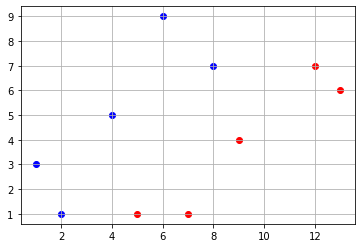

le score est :  1.0
les coefficients des betas sont:  [-1.5553672487680952, 0.6666017503309343, -0.7776943194015515]


In [14]:

import pandas as pd; 
from numpy import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

donnees=pd.read_csv("/Users/mac/Downloads/pointsSVM.csv",sep=';')
#print(donnees)
donnees=array(donnees)
print(donnees)
X=donnees[:,0:2]
print("x : ",X)
y=donnees[:,2]
print("y: ",y)
axes = plt.axes() 
axes.grid()
plt.scatter(X[y ==+1][:, 0], X[y ==+1][:, 1], color='r') #pour les positifs
plt.scatter(X[y ==-1][:, 0], X[y == -1][:, 1], color='b') #pour les negatifs
plt.show()
def f(X, Beta): #pour la fonction f(x)
    return Beta[0]+sum(X.T*Beta[1:])

def classer (X,Beta): #retourne le signe de f(x)
    return int(sign(f(X,Beta)))

from sklearn.svm import LinearSVC, SVC
#pour le svm de classification
lsvm = LinearSVC(C=10000); 
X_train=donnees[:,0:2] #pour les x
y_train=donnees[:,2] #pour les y
lsvm.fit(X_train, y_train); 
score=lsvm.score(X_train, y_train)
print("le score est : ",score); 
Beta=list(lsvm.intercept_)+list(lsvm.coef_[0]) #pour trouver les coefficients beta
print("les coefficients des betas sont: ",Beta)


In [ ]:
#pour tracer les droites de separation

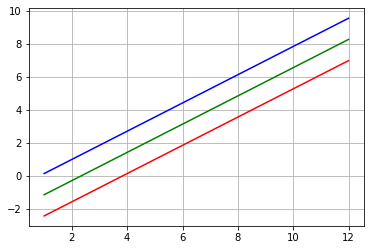

[-1.5553672487680952, 0.6666017503309343, -0.7776943194015515]
[5,1]==› 0.9999471834850244
[2,1] -0.9998580675077782
[6,9]==› -4.555005621396454
[12,2] 5.666159435801564


In [24]:
axes = plt.axes()
axes.grid()
plt.scatter(X[y ==+1][:, 0], X[y ==+1][:, 1], color='r')
plt.scatter(X[y ==-1][:, 0], X[y == -1][:, 1], color='b')
Bleu=[] #pour la droite bleu
Rouge=[] #pour la droite rouge
milieu=[] #pour la droite verte
for abscisseX in range(1,13): #f(x)=-0.777*X2 + 0.666*X1 - 1.555
    y=-1.0*(Beta[0]+Beta[1]*abscisseX+1)/Beta[2]
    Bleu+=[y]
    y=-1.0*(Beta[0]+Beta[1]*abscisseX-1)/Beta[2]
    Rouge+=[y]
    y=-1.0*(Beta[0]+Beta[1]*abscisseX)/Beta[2]
    milieu+=[y]
plt.plot(arange(1,13),Bleu,color='b')
plt.plot(arange(1,13), Rouge, color='r')
plt.plot(arange(1,13),milieu,color='g')
plt.show()
print(Beta)
print('[5,1]==›',f(array([5,1]),Beta));
print('[2,1]',f(array([2,1]),Beta))
print('[6,9]==›',f(array([6,9]),Beta));
print('[12,2]',f(array([12,1]),Beta))

In [ ]:
#pour le modele non lineairement separable 

#SVC(kernel='linear') <==> LinearSVC

#SVC(C=1000) <==> NuSVC(auto='gamma')

#le C doit etre superieure

#gamma doit etre grande pour prendre en cpnsideration tous les points de donnees

pour le modele svc
1.0
pour le model nusvc
1.0
pour le modele linearSVC
0.6
[0.5673110108984909, 0.05833850204411373, -0.35945811503438196]


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


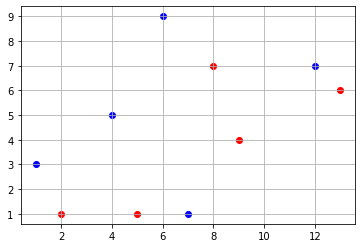

In [42]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

donnees= pd. read_csv ("/Users/mac/Downloads/pointsSVM2.csv", sep=';')
donnees=array(donnees)
#print(donnees)
x=donnees[:,0:2] #les 2 colonnes
y=donnees[:,2] #la 3 colonne
axes= plt.axes()
axes.grid()
plt.scatter ( x[y ==+1][:, 0], x[y ==+1][:, 1], color='r') #rouge +
plt.scatter(x[y ==-1][:, 0], x[y == -1][:, 1], color='b') #bleu -

def f(x,Beta):
    return Beta [0]+sum(X. T*Beta[1:])

def classer (X, Beta): 
    return int (sign (f(x, Beta))) 

from sklearn.svm import LinearSVC, SVC, NuSVC

x_tr=donnees[:,0: 2]
y_tr=donnees [:,2]

print("pour le modele svc")
lsvm=SVC(gamma='auto')
lsvm.fit(x_tr, y_tr)
score = lsvm. score (x_tr, y_tr) 
print (score)

print("pour le model nusvc")
lsvm= NuSVC (gamma='auto')
lsvm.fit (x_tr, y_tr)
score = lsvm.score(x_tr, y_tr) 
print(score)

print("pour le modele linearSVC")
lsvm= LinearSVC(C=1000)
lsvm.fit(x_tr, y_tr)
score = lsvm. score (x_tr, y_tr) 
print(score)

Beta=list(lsvm.intercept_)+list(lsvm.coef_[0])
print(Beta) 
plt.show()

In [ ]:
# modele pour l'analyse des sentiments

In [52]:
with open("/Users/mac/Downloads/reviews.txt") as f:
  reviews = f.read().split("\n")
with open("/Users/mac/Downloads/labels.txt") as f: #un texte contient positif negatif
  labels = f.read().split("\n")

reviews_tokens = [review.split() for review in reviews]

from sklearn.preprocessing import MultiLabelBinarizer
MLB = MultiLabelBinarizer()
MLB.fit(reviews_tokens)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(reviews_tokens, labels, test_size=0.25, random_state=None)

from sklearn.svm import LinearSVC

lsvm = LinearSVC(); 
lsvm.fit (MLB.transform(X_train), y_train) 
score=lsvm.score(MLB.transform(X_test), y_test)
print (score*100,'%')


86.72 %
